In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('new_york_data.csv', index_col = 0)

C:\Users\olivi\AppData\Local\Temp\ipykernel_7932\2076588821.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_data.csv', index_col = 0)


In [3]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
_merge                 object
dtype: object

<Axes: xlabel='member_casual'>

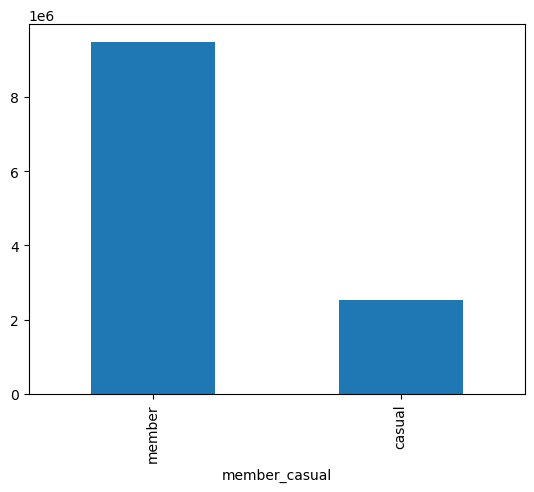

In [4]:
df['member_casual'].value_counts().plot(kind = 'bar')

In [5]:
df['member_casual'].plot(kind = 'bar')

TypeError: no numeric data to plot

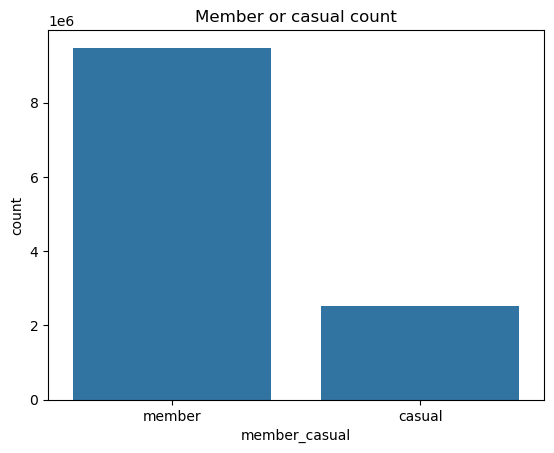

In [6]:
sns.countplot(data = df, x = 'member_casual')
plt.title("Member or casual count")
plt.show()

## Types of seaborn visualizations

Bar Chart

In [7]:
df['value'] = 1

In [8]:
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [9]:
df_t

,start_station_name,value
0,1 Ave & E 110 St,9609
1,1 Ave & E 16 St,27537
2,1 Ave & E 18 St,29602
3,1 Ave & E 30 St,17581
4,1 Ave & E 39 St,22517
...,...,...
1756,Wyckoff Ave & Gates Ave,7597
1757,Wyckoff St & 3 Ave,154
1758,Wyckoff St & Nevins St,4304
1759,Wythe Ave & Metropolitan Ave,27490


In [10]:
top20 = df_t.nlargest(20, 'value')

In [11]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,52629
8,1 Ave & E 68 St,48603
495,Broadway & W 58 St,45270
1718,West St & Chambers St,44562
286,6 Ave & W 33 St,41279
1511,University Pl & E 14 St,39656
788,E 33 St & 1 Ave,38674
463,Broadway & E 21 St,38310
461,Broadway & E 14 St,38197
485,Broadway & W 25 St,37979


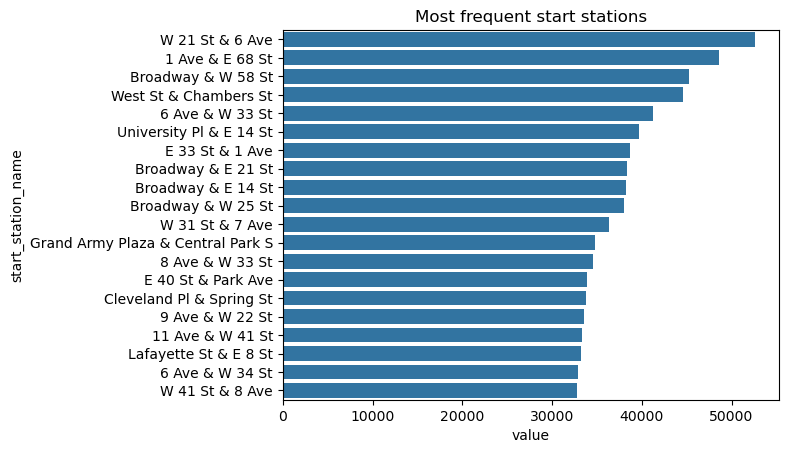

In [12]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

C:\Users\olivi\AppData\Local\Temp\ipykernel_7932\2839758038.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))


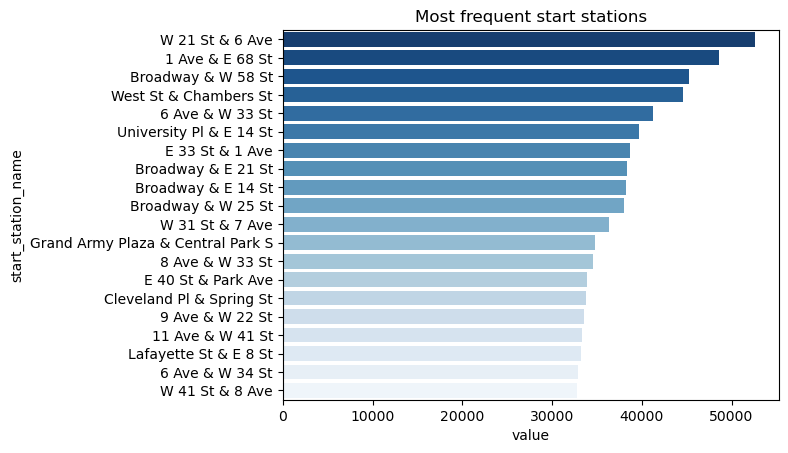

In [13]:
sns.barplot(data = top20, x = 'value', y = 'start_station_name', palette=("Blues_r"))
plt.title("Most frequent start stations")
plt.show()

Line Plot

In [14]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [15]:
# Groupby the count of the trips 
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Exclude 2021 before grouping
df_filtered = df[(df['date'] < '2021-01-01') | (df['date'] > '2021-12-31')]

# Group by date and count trips
df_group = df_filtered.groupby('date')['ride_id'].count().reset_index()

In [16]:
df_group.head()

,date,ride_id
0,2022-01-01,19905
1,2022-01-02,41920
2,2022-01-03,32309
3,2022-01-04,35935
4,2022-01-05,33411


In [17]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = 'merge_flag')
print(df['merge_flag'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

merge_flag
both          11999379
left_only          621
right_only           0
Name: count, dtype: int64
Shape of January 1st is (19905, 19)
Shape of January 2nd is (41920, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')


In [18]:
df_temp.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', '_merge', 'value', 'bike_rides_daily',
       'merge_flag'],
      dtype='object')

In [19]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,_merge,value,bike_rides_daily,merge_flag
date,,,,,,,,,,,,,,,,,,
2021-01-30,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,NaN,left_only,1,NaN,left_only
2021-02-15,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,NaN,left_only,1,NaN,left_only
2021-04-30,8AFBCFEE21703C2D,classic_bike,2021-04-30 16:56:21.003,2022-03-08 17:18:57.580,Bedford Ave & Nassau Ave,5550.05,Lorimer St & Broadway,4965.01,40.723117,-73.952123,40.704118,-73.948186,casual,NaN,left_only,1,NaN,left_only
2021-07-10,BA13AC6CD2C65E88,classic_bike,2021-07-10 14:53:21.751,2022-09-09 21:21:15.210,E Tremont Ave & E 176 St,8356.02,Popham Ave & W 174 St,8348.02,40.847798,-73.901883,40.847746,-73.922079,casual,NaN,left_only,1,NaN,left_only
2021-07-22,2F298092D779509A,classic_bike,2021-07-22 11:49:56.126,2022-01-21 13:15:37.645,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,NaN,left_only,1,NaN,left_only


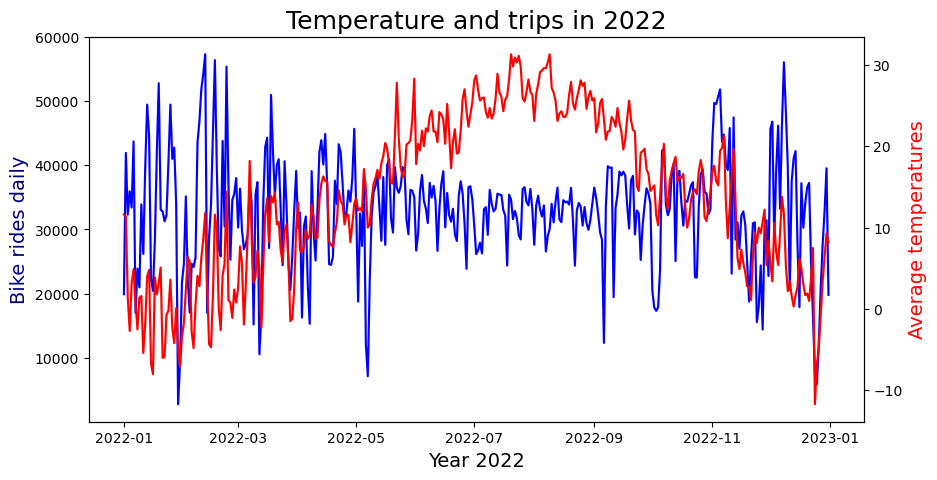

In [20]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp['bike_rides_daily'], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

ax2 = ax.twinx()
sns.lineplot(data = df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

Box Plots

In [21]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
value                          int64
bike_rides_daily             float64
merge_flag                  category
dtype: object

In [22]:
df_cat = df

In [23]:
df_cat['rideable_type'] = df_cat['rideable_type'].astype('category')


In [24]:
df_cat['rideable_type']

0           electric_bike
1            classic_bike
2            classic_bike
3            classic_bike
4            classic_bike
                ...      
11999995    electric_bike
11999996     classic_bike
11999997    electric_bike
11999998    electric_bike
11999999     classic_bike
Name: rideable_type, Length: 12000000, dtype: category
Categories (2, object): ['classic_bike', 'electric_bike']

In [27]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag'],
      dtype='object')

C:\Users\olivi\AppData\Local\Temp\ipykernel_7932\990264754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'orange'})


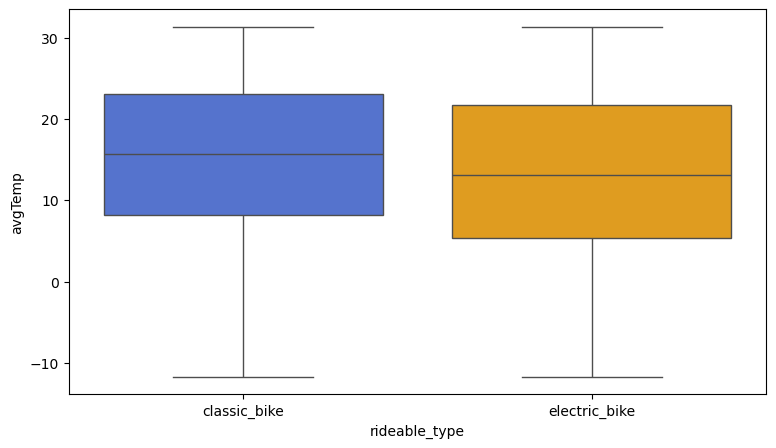

In [28]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'orange'})
plt.show()

The boxplot comparing rideable_type and avgTemp shows that classic bikes are used more frequently across all temperature ranges compared to electric bikes. The distribution reveals that at higher temperatures, classic bike usage is more prominent, suggesting that riders might prefer them for longer or more recreational trips in warm weather. However, at lower-average temperatures, both bike types show a more similar distribution, indicating that electric bikes may be a more appealing choice in colder conditions, possibly due to the reduced physical effort required.

Violin plot

C:\Users\olivi\AppData\Local\Temp\ipykernel_7932\2252238160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'orange'})


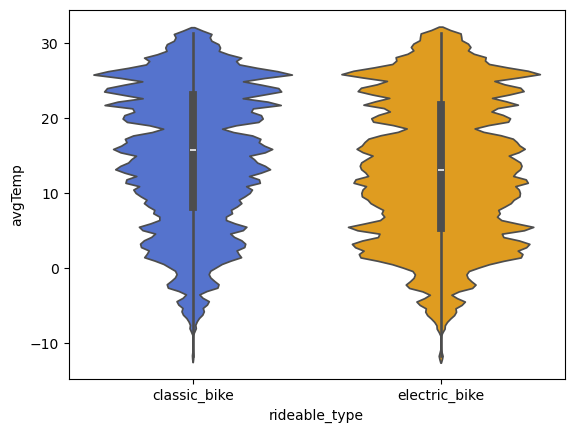

In [29]:
sns.violinplot(x = 'rideable_type', y = 'avgTemp', data = df, palette = {'classic_bike': 'royalblue', 'electric_bike': 'orange'})
plt.show()

Strip Plot

C:\Anaconda\envs\venv_citi_bike\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


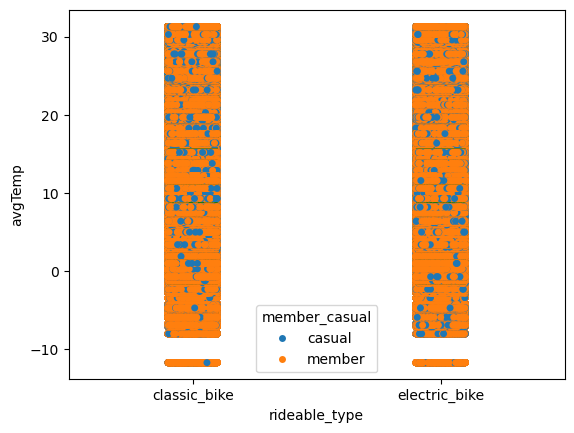

In [31]:
sns.stripplot(x = 'rideable_type', y = 'avgTemp', data = df, hue = 'member_casual')
plt.show()

In [32]:
sns.reset_orig()

FacetGrids

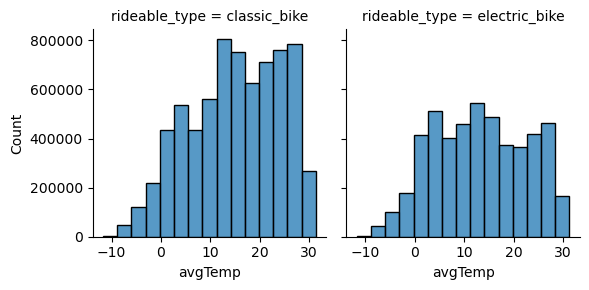

In [33]:
grid = sns.FacetGrid(df, col = "rideable_type")
grid.map(sns.histplot, "avgTemp", bins = 15)
plt.show()

The FacetGrid plot comparing rideable_type and avgTemp reveals that classic bikes are used more frequently across all temperature ranges than electric bikes. However, at higher temperatures, classic bike usage increases significantly, suggesting that riders may prefer traditional bikes in warm weather, possibly due to longer or more leisurely rides. In contrast, during lower-average temperatures, the usage of both bike types is more balanced, indicating that electric bikes might be a more attractive option in colder conditions, potentially because they require less physical effort in unfavorable weather.

Histogram

In [34]:
sns.set_style('darkgrid')

In [35]:
%matplotlib inline

<Figure size 900x500 with 0 Axes>

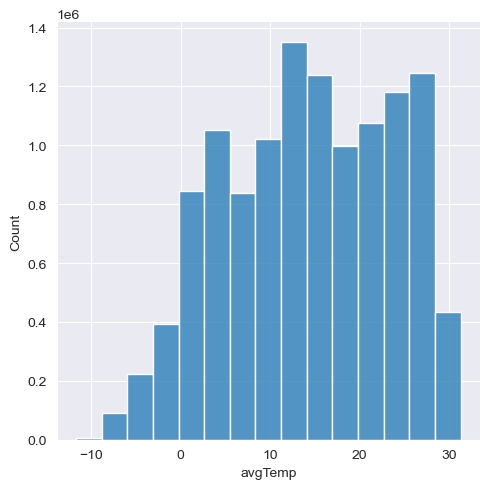

In [36]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

In [37]:
sns.reset_orig()

<Figure size 900x500 with 0 Axes>

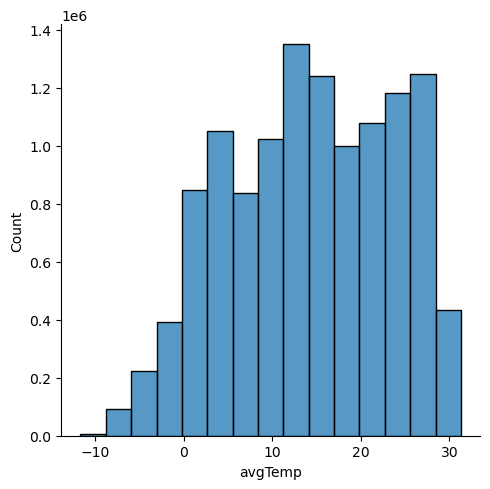

In [38]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

In [39]:
sns.set_style('whitegrid')

<Figure size 900x500 with 0 Axes>

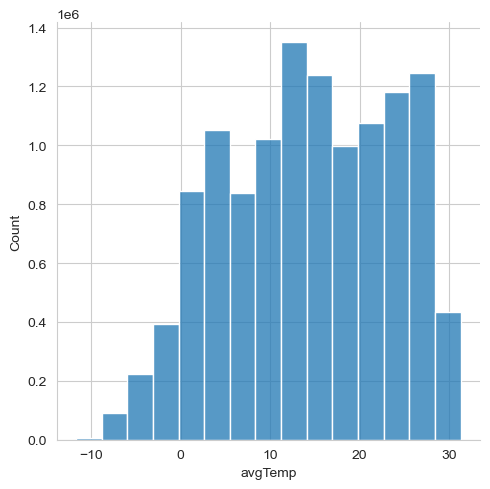

In [40]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

In [41]:
sns.set_style('dark')

<Figure size 900x500 with 0 Axes>

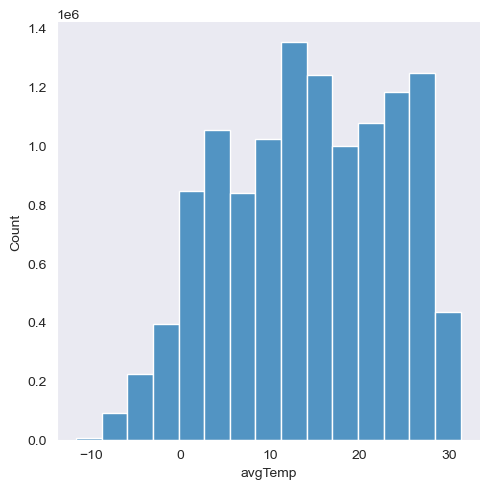

In [42]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

In [43]:
sns.set_style('white')

<Figure size 900x500 with 0 Axes>

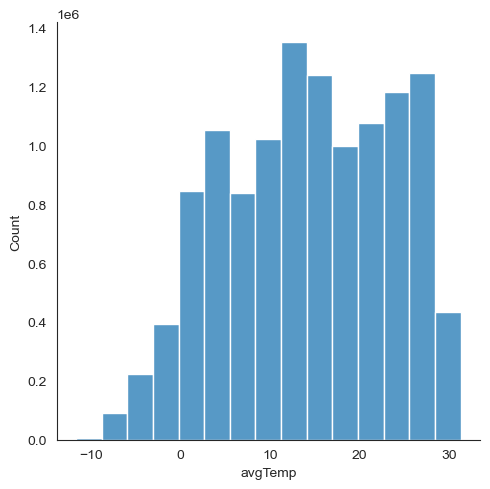

In [44]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

In [45]:
sns.set_style('ticks')

<Figure size 900x500 with 0 Axes>

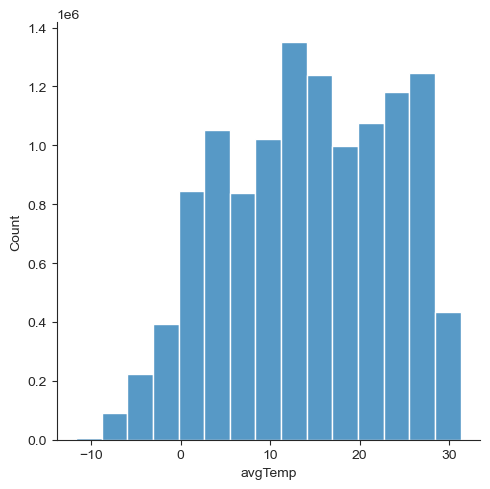

In [47]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

In [48]:
sns.set_theme()

<Figure size 900x500 with 0 Axes>

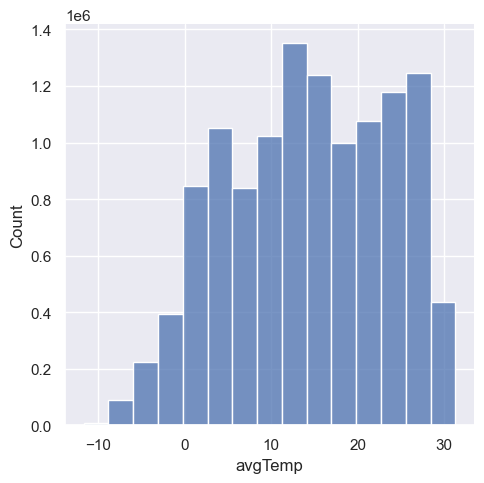

In [49]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

Palettes

In [52]:
sns.set_style("dark")
sns.set_palette('PuRd_r')

<Figure size 900x500 with 0 Axes>

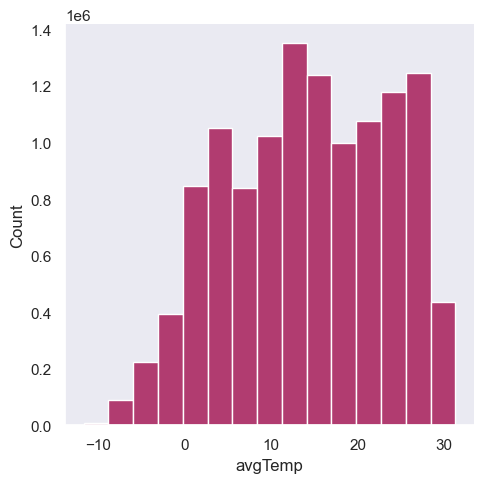

In [53]:
plt.figure(figsize=(9,5))
sns.displot(df['avgTemp'], bins = 15)
plt.show()

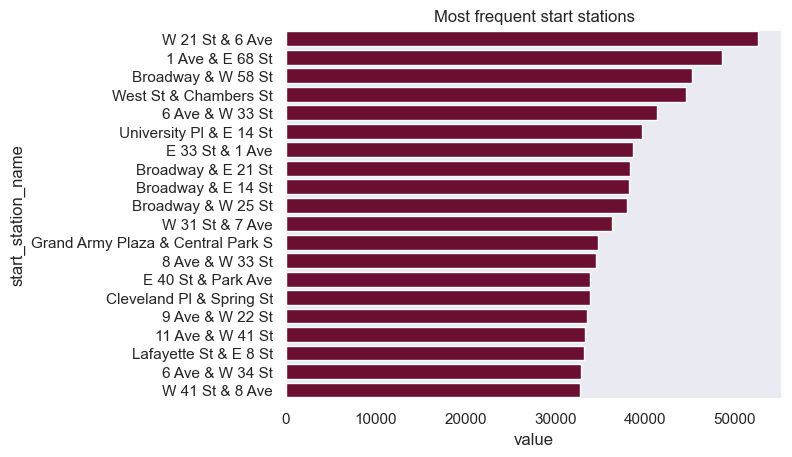

In [61]:
sns.set_palette('PuRd_r', n_colors = 20)
sns.barplot(data = top20, x = 'value', y = 'start_station_name')
plt.title("Most frequent start stations")
plt.show()

In [62]:
df.to_csv('new_york_data.csv')